In [9]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

#to make numbers easier to read
pd.options.display.float_format ='{:20.2f}'.format

#to show all columns on output 
pd.set_option('display.max_columns',999)

### Data Exploration

In [11]:
df = pd.read_excel('data/online_retail_II.xlsx', sheet_name=0)
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [13]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


In [14]:
df.describe(include='O')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


EXAMINE THE MISSING CUSTOMER IDs
We can drop them because there's no way to classify customers without an ID

In [16]:
df[df['Customer ID'].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


EXAMINE THE NEGATIVE QUANTITY

In [18]:
df[df['Quantity']<0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.00,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.00,United Kingdom


From the data source  we are told 'c' in the invoice signifies cancellation

Let's see if there are invoices without c

In [20]:
df['Invoice']= df['Invoice'].astype('str')
df[df['Invoice'].str.match('^\\d{6}$')==True]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


CHECK IF THERE ARE INVOICE NUMBERS THAT START WITH  OTHER  LETTERS

In [22]:
df['Invoice'].str.replace('[0-9]','',regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [23]:
df[df['Invoice'].str.startswith('A')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


IT LOOKS LIKE WE HAVE INVOICES STARTING WITH A. SINCE THESE HAVE NO CUSTOMER ID AND IT'S JUST 3, WE WILL DROP IT WHILE CLEANING.
ALSO, From the datacard, Stockcode should be a 5-digit integral number uniquely assigned to each distinct product. However, in these3 we have it as B. We will now check if there are others like this, that don't have 5 digit number in their stockcode


In [25]:
df['StockCode']= df['StockCode'].astype('str')
df[(df['StockCode'].str.match('^\\d{5}$')==False) & 
   (df['StockCode'].str.match('^\\d{5}[a-zA-Z]+$')==False)]['StockCode'].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

There are quite a number of stock codes that do not follow the expected pattern of stock code. We will look at them one after the other


In [27]:
df[(df['StockCode'].str.contains('^DOT$')) & (df['Customer ID'].isna())]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524272,538071,DOT,DOTCOM POSTAGE,1,2010-12-09 14:09:00,885.94,NaN,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


IT SEEMS ALL 'DOT' STOCK CODES have no Customer ID so we can conviniently drop those in cleaning

In [29]:
df[(df['StockCode'].str.contains('^D$'))& ((df['Quantity']<0) ==False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
160443,504700,D,Discount,1,2010-04-15 18:08:00,57.63,17032.00,United Kingdom
212633,509979,D,Discount,1,2010-05-26 14:07:00,101.99,12843.00,United Kingdom
312285,519808,D,Discount,192,2010-08-20 12:50:00,1.00,16422.00,United Kingdom
494226,535657,D,Discount,1,2010-11-28 11:20:00,13.98,14527.00,United Kingdom
501237,536158,D,Discount,1,2010-11-30 11:57:00,32.29,13634.00,United Kingdom


FROM THE 'D' STOCK CODE, I observed we have 95 rows with -1 quantity, which signifies a return, and 3 have both negative 1 quantity and no customer ID. 5 have valid quantity and customer ID

In [31]:
df[df['StockCode'].str.contains('DCGS')]  #drop

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2377,489597,DCGS0058,MISO PRETTY GUM,1,2009-12-01 14:28:00,0.83,NaN,United Kingdom
2378,489597,DCGS0068,DOGS NIGHT COLLAR,1,2009-12-01 14:28:00,8.65,NaN,United Kingdom
8371,490074,DCGS0004,HAYNES CAMPER SHOULDER BAG,1,2009-12-03 14:39:00,17.35,NaN,United Kingdom
8372,490074,DCGS0058,MISO PRETTY GUM,1,2009-12-03 14:39:00,0.83,NaN,United Kingdom
8373,490074,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2009-12-03 14:39:00,16.48,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
466308,533348,DCGSSBOY,BOYS PARTY BAG,1,2010-11-17 09:23:00,3.36,NaN,United Kingdom
478086,534289,DCGS0003,BOXED GLASS ASHTRAY,1,2010-11-22 11:25:00,2.51,NaN,United Kingdom
496962,535835,DCGSSBOY,BOYS PARTY BAG,3,2010-11-29 09:46:00,3.36,NaN,United Kingdom
496963,535835,DCGSSGIRL,GIRLS PARTY BAG,3,2010-11-29 09:46:00,3.36,NaN,United Kingdom


In [32]:
df[df['StockCode'].str.contains('PADS')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
62299,494914,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-19 17:04:00,0.00,16705.00,United Kingdom
74731,496222,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-29 13:53:00,0.00,13583.00,United Kingdom
77702,496473,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-01 15:38:00,0.00,17350.00,United Kingdom
79794,496643,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-03 11:58:00,0.00,13408.00,United Kingdom
90798,497935,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-15 10:47:00,0.00,13408.00,United Kingdom
97716,498562,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-21 12:03:00,0.00,15182.00,United Kingdom
101718,499056,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-24 13:46:00,0.00,13765.00,United Kingdom
104480,499399,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-26 13:26:00,0.00,14459.00,United Kingdom
123947,501176,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-03-15 11:00:00,0.00,14857.00,United Kingdom
156809,504332,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-04-12 16:30:00,0.00,12671.00,Germany


OF ALL THE STOCKCODES, ONLY 'PADS' SEEMS LEGITIMATE. WE WILL EXCLUDE ALL OTHERS FROM CLUSTERING

In [34]:
df['Description'].unique().tolist()


['15CM CHRISTMAS GLASS BALL 20 LIGHTS',
 'PINK CHERRY LIGHTS',
 ' WHITE CHERRY LIGHTS',
 'RECORD FRAME 7" SINGLE SIZE ',
 'STRAWBERRY CERAMIC TRINKET BOX',
 'PINK DOUGHNUT TRINKET POT ',
 'SAVE THE PLANET MUG',
 'FANCY FONT HOME SWEET HOME DOORMAT',
 'CAT BOWL ',
 'DOG BOWL , CHASING BALL DESIGN',
 'HEART MEASURING SPOONS LARGE',
 'LUNCHBOX WITH CUTLERY FAIRY CAKES ',
 'DOOR MAT BLACK FLOCK ',
 'LOVE BUILDING BLOCK WORD',
 'HOME BUILDING BLOCK WORD',
 'ASSORTED COLOUR BIRD ORNAMENT',
 ' PEACE WOODEN BLOCK LETTERS',
 'CHRISTMAS CRAFT WHITE FAIRY ',
 'HEART IVORY TRELLIS LARGE',
 'HEART FILIGREE DOVE LARGE',
 'FULL ENGLISH BREAKFAST PLATE',
 'PIZZA PLATE IN BOX',
 'BLACK DINER WALL CLOCK',
 'SET OF 3 BLACK FLYING DUCKS',
 'AREA PATROLLED METAL SIGN',
 'PLEASE ONE PERSON  METAL SIGN',
 'BATH BUILDING BLOCK WORD',
 'CLASSIC WHITE FRAME',
 'SMALL MARSHMALLOWS PINK BOWL',
 'BISCUITS SMALL BOWL LIGHT BLUE',
 'SCOTTIE DOG HOT WATER BOTTLE',
 'CHRISTMAS CRAFT HEART DECORATIONS',
 'CHRISTMAS CRA

In [35]:
df['Country'].unique().tolist()

['United Kingdom',
 'France',
 'USA',
 'Belgium',
 'Australia',
 'EIRE',
 'Germany',
 'Portugal',
 'Japan',
 'Denmark',
 'Nigeria',
 'Netherlands',
 'Poland',
 'Spain',
 'Channel Islands',
 'Italy',
 'Cyprus',
 'Greece',
 'Norway',
 'Austria',
 'Sweden',
 'United Arab Emirates',
 'Finland',
 'Switzerland',
 'Unspecified',
 'Malta',
 'Bahrain',
 'RSA',
 'Bermuda',
 'Hong Kong',
 'Singapore',
 'Thailand',
 'Israel',
 'Lithuania',
 'West Indies',
 'Lebanon',
 'Korea',
 'Brazil',
 'Canada',
 'Iceland']

### DATA CLLEANING

In [37]:
cleaned_df=df.copy()

In [38]:
#filtering out invoices that don't follow the right pattern
cleaned_df['Invoice']= cleaned_df['Invoice'].astype('str')
mask= (
    cleaned_df['Invoice'].str.match('^\\d{6}&')==True
)
cleaded_df=cleaned_df[mask]
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [39]:
cleaned_df['StockCode']= cleaned_df['StockCode'].astype('str')
mask=(
(cleaned_df['StockCode'].str.match('^\\d{5}$')==True)
    |(cleaned_df['StockCode'].str.match('^\\d{5}[a-zA-Z]+$')==True)
    |(cleaned_df['StockCode'].str.match('^PADS$')==True)
)
cleaned_df=cleaned_df[mask]
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [40]:
cleaned_df.dropna(subset=['Customer ID'], inplace=True)
cleaned_df

C:\Users\olami\AppData\Local\Temp\ipykernel_25424\909425933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(subset=['Customer ID'], inplace=True)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [41]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,415732.00,415732,415732.00,415732.00
mean,12.81,2010-07-01 01:38:55.922276864,3.03,15366.23
min,-9360.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 11:56:00,1.25,13995.00
50%,5.00,2010-07-08 19:56:00,1.95,15311.00
75%,12.00,2010-10-14 14:14:00,3.75,16805.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,101.43,NaN,4.47,1678.37


In [42]:
cleaned_df = cleaned_df[cleaned_df['Quantity'] >= 0]
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [43]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406337.00,406337,406337.00,406337.00
mean,13.62,2010-07-01 10:11:06.543288320,2.99,15373.63
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14004.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.37


In [44]:
cleaned_df[cleaned_df['Price']==0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.00,16126.00,United Kingdom
6781,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.00,15658.00,United Kingdom
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.00,14108.00,United Kingdom
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.00,14108.00,United Kingdom
32916,492079,85042,ANTIQUE LILY FAIRY LIGHTS,8,2009-12-15 13:49:00,0.00,15070.00,United Kingdom
40101,492760,21143,ANTIQUE GLASS HEART DECORATION,12,2009-12-18 14:22:00,0.00,18071.00,United Kingdom
47126,493761,79320,FLAMINGO LIGHTS,24,2010-01-06 14:54:00,0.00,14258.00,United Kingdom
48342,493899,22355,"CHARLOTTE BAG , SUKI DESIGN",10,2010-01-08 10:43:00,0.00,12417.00,Belgium
57619,494607,21533,RETRO SPOT LARGE MILK JUG,12,2010-01-15 12:43:00,0.00,16858.00,United Kingdom
111348,500073,21662,VINTAGE GLASS COFFEE CADDY,1,2010-03-04 11:44:00,0.00,13047.00,United Kingdom


In [45]:
cleaned_df=cleaned_df[cleaned_df['Price']>0]

In [46]:
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [47]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406309.00,406309,406309.00,406309.00
mean,13.62,2010-07-01 10:14:25.869572352,2.99,15373.72
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14006.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.33


the minimum price is still 0, let's check to see what the issue is 

In [49]:
cleaned_df['Price'].min()

np.float64(0.001)

oh okay, since we had already set our values to be in 2d.p, 0.001 was made to appear as 0

Let's see how much data we have lost in the cleaning process

In [52]:
len(cleaned_df)/len(df)

0.7732429238325965

Meaning we dropped 23% of the data 

In [54]:
cleaned_df['SalesLineTotal']= cleaned_df['Quantity']* cleaned_df['Price']
cleaned_df

C:\Users\olami\AppData\Local\Temp\ipykernel_25424\4073502247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['SalesLineTotal']= cleaned_df['Quantity']* cleaned_df['Price']


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,7.50


AGGREGATE DATA: group by Customer ID, agregate for frequency, recency, and monetory value

In [56]:
aggregated_df=cleaned_df.groupby(by='Customer ID', as_index=False)\
    .agg(
        MonetaryValue=('SalesLineTotal','sum'),
        Frequency= ('Invoice', 'nunique'),
        LastInvoiceDate= ('InvoiceDate','max') #recency
    )
aggregated_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.00,169.36,2,2010-06-28 13:53:00
1,12347.00,1323.32,2,2010-12-07 14:57:00
2,12348.00,221.16,1,2010-09-27 14:59:00
3,12349.00,2221.14,2,2010-10-28 08:23:00
4,12351.00,300.93,1,2010-11-29 15:23:00


In [57]:
max_invoice_date= aggregated_df['LastInvoiceDate'].max()
#I'm making use of max_invoice date because this dataset is so old that if we use current date, the recency values may be too large
aggregated_df['Recency']=(max_invoice_date - aggregated_df['LastInvoiceDate']).dt.days
aggregated_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,169.36,2,2010-06-28 13:53:00,164
1,12347.00,1323.32,2,2010-12-07 14:57:00,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73
3,12349.00,2221.14,2,2010-10-28 08:23:00,42
4,12351.00,300.93,1,2010-11-29 15:23:00,10


We will plot histograms to spot outliers

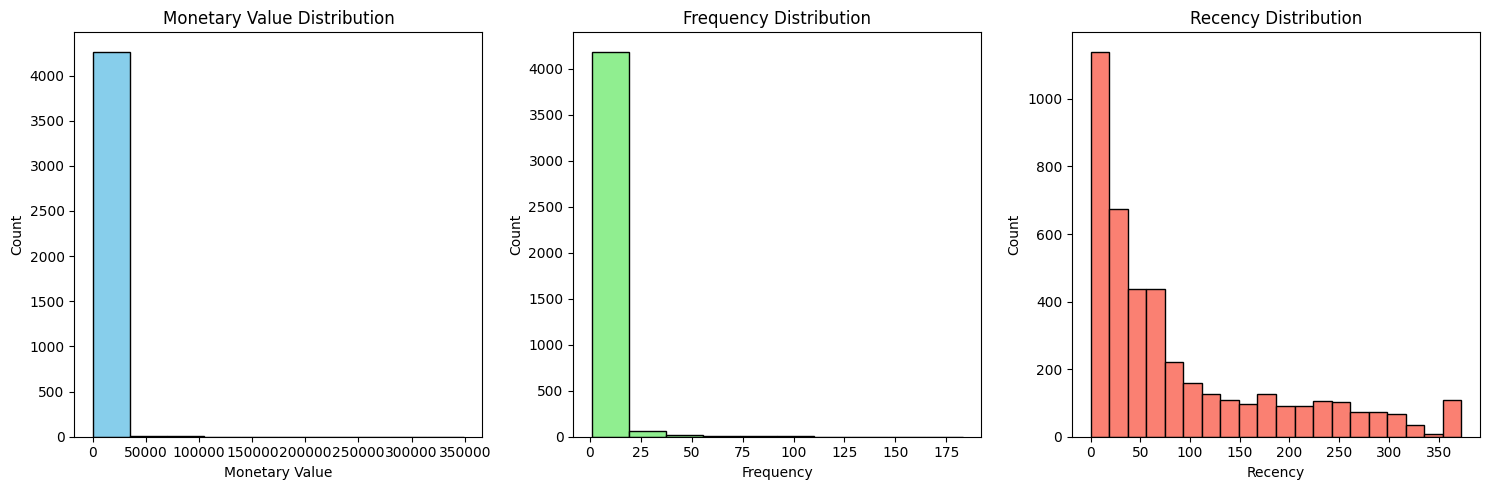

In [59]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(aggregated_df['MonetaryValue'], bins=10, color='skyblue', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1,3,2)
plt.hist(aggregated_df['Frequency'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1,3,3)
plt.hist(aggregated_df['Recency'], bins=20, color='salmon', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

To oberve our data in more detail, we will use boxplot

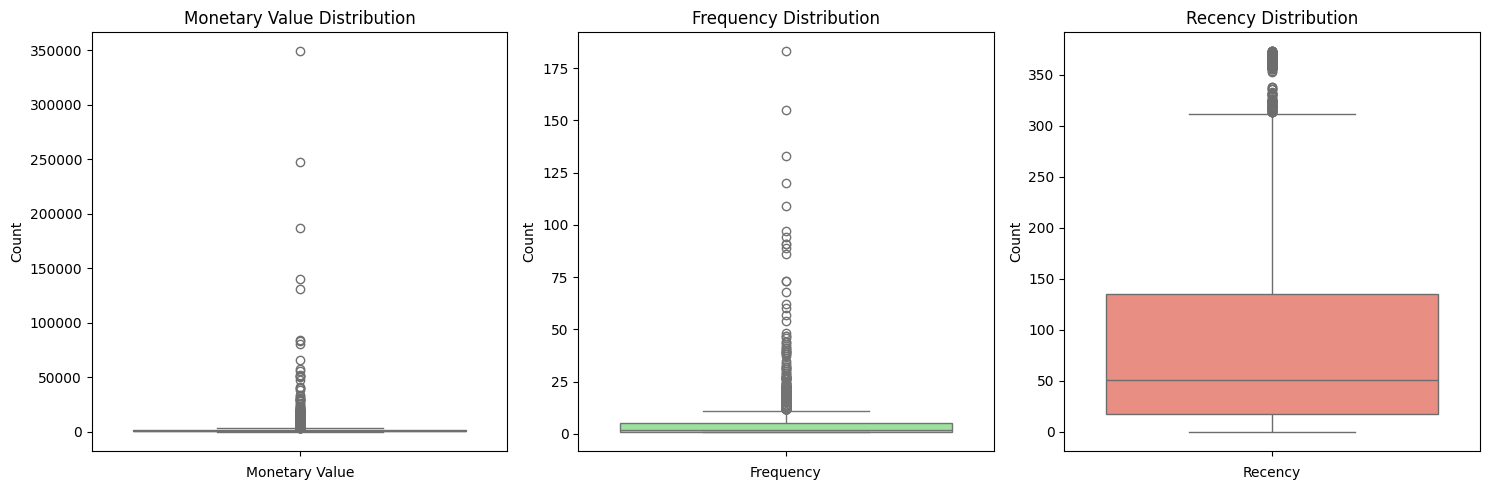

In [61]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(aggregated_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1,3,2)
sns.boxplot(aggregated_df['Frequency'],color='lightgreen')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1,3,3)
sns.boxplot(aggregated_df['Recency'], color='salmon')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

There are clearly a lot of outliers in the monetary distribution and frequency Distribution. It shows a number of customers spend a lot quite frequently. Since these are high valued customers for our client, we can't simply drop them. However, we can separate them from the data we will use for K mean clustering and keep them another analysis

In [63]:
#to separate out the outlier data, we will use the interquartile
M_Q1= aggregated_df['MonetaryValue'].quantile(0.25)
M_Q2= aggregated_df['MonetaryValue'].quantile(0.5)
M_Q3= aggregated_df['MonetaryValue'].quantile(0.75)
M_IQR= M_Q3-M_Q1

#TO PERFORM THE SEPRATION, WE NEED TO CREATE A DATAFRAME FOR MONETARY OUTLIERS
monetary_outliers_df=aggregated_df[(aggregated_df['MonetaryValue']>(M_Q3+1.5*M_IQR))|(aggregated_df['MonetaryValue']<(M_Q1 - 1.5*M_IQR))]
#note 1.5* interquartile range is the general accepted definition of outliers
#note (aggregated_df['MonetaryValue']>(M_Q3+1.5*M_IQR) is for the upper and (aggregated_df['MonetaryValue']<(M_Q1-1.5*M_IQR) is for lower
monetary_outliers_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
9,12357.00,11229.99,1,2010-11-16 10:05:00,23
25,12380.00,4782.84,4,2010-08-31 14:54:00,100
42,12409.00,12346.62,4,2010-10-15 10:24:00,55
48,12415.00,19468.84,4,2010-11-29 15:07:00,10
61,12431.00,4145.52,11,2010-12-01 10:03:00,8
...,...,...,...,...,...
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41
4253,18251.00,21964.14,8,2010-09-20 13:26:00,80


In [64]:
#to separate out the outlier data, we will use the interquartile
F_Q1= aggregated_df['Frequency'].quantile(0.25)
F_Q2= aggregated_df['Frequency'].quantile(0.5)
F_Q3= aggregated_df['Frequency'].quantile(0.75)
F_IQR= F_Q3-F_Q1

#TO PERFORM THE SEPRATION, WE NEED TO CREATE A DATAFRAME FOR MONETARY OUTLIERS
frequency_outliers_df=aggregated_df[(aggregated_df['Frequency']>(F_Q3+1.5*F_IQR))|(aggregated_df['Frequency']<(F_Q1 - 1.5*F_IQR))]
#note 1.5* interquartile range is the general accepted definition of outliers
#note (aggregated_df['Frequency']>(F_Q3+1.5*F_IQR) is for the upper and (aggregated_df['Frequency']<(F_Q1-1.5*F_IQR) is for lower
frequency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,279.00,279.00,279.00,279,279.00
mean,15352.66,14409.71,23.81,2010-11-23 11:06:20.645161216,16.09
min,12437.00,1094.39,12.00,2010-05-12 16:51:00,0.00
25%,13800.00,4331.56,13.00,2010-11-20 13:14:30,2.00
50%,15465.00,6615.77,17.00,2010-12-02 10:46:00,7.00
75%,16828.50,11692.41,23.00,2010-12-07 11:08:30,19.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,211.00
std,1748.43,31381.74,21.93,NaN,26.59


In [65]:
non_outliers_df= aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index))&(~aggregated_df.index.isin(frequency_outliers_df.index))]
non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3809.00,3809.00,3809.00,3809,3809.00
mean,15376.48,885.50,2.86,2010-09-03 11:16:46.516146176,97.08
min,12346.00,1.55,1.00,2009-12-01 10:49:00,0.00
25%,13912.00,279.91,1.00,2010-07-08 14:48:00,22.00
50%,15389.00,588.05,2.00,2010-10-12 16:25:00,58.00
75%,16854.00,1269.05,4.00,2010-11-17 13:14:00,154.00
max,18287.00,3788.21,11.00,2010-12-09 20:01:00,373.00
std,1693.20,817.67,2.24,NaN,98.11


NOW THAT WE HAVE SEPARATED OUTLIERS FROM THE CLEANED_DF, LET'S USE BOX PLOT TO SEE THE DISTRIBUTION 

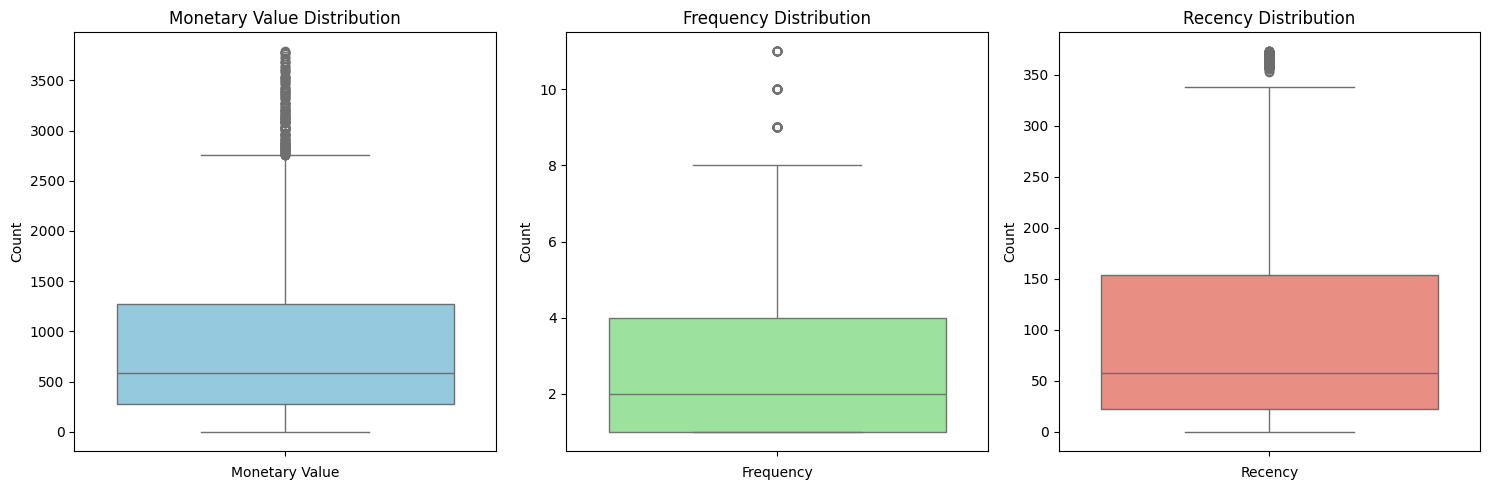

In [67]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(non_outliers_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1,3,2)
sns.boxplot(non_outliers_df['Frequency'],color='lightgreen')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1,3,3)
sns.boxplot(non_outliers_df['Recency'], color='salmon')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

creating a 3d scatter plot. This will help us see the scaling. Our K mean clustering is very sensitive to scaling. If we have such large differences in scale, and we out them all in the same scale, it can cause all our data to be squashed in one side of the plot. the centroids that are generated will be shifted to feature at the side where the data is concentrated, which will have a high influence on our centroid positioning compared to the other features. We don't want this. we want our algorithm to treat each of our features with equal weight and equal positioning to get a fair clustering.

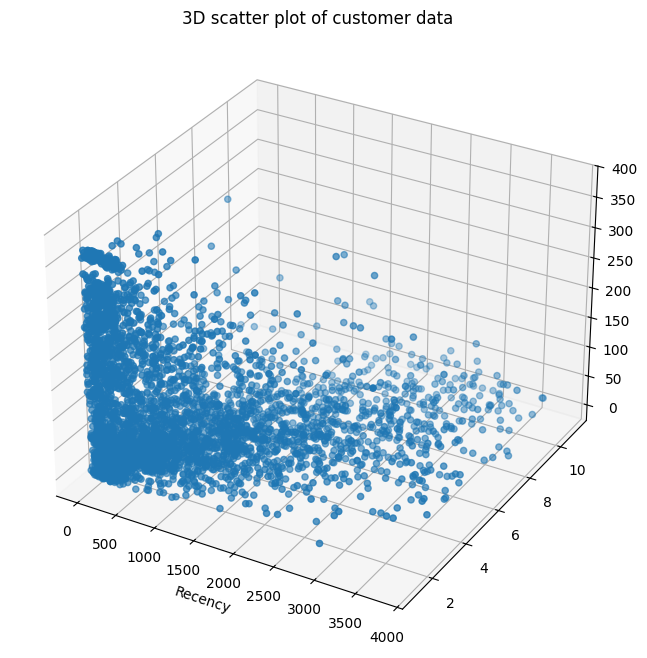

In [69]:
fig= plt.figure(figsize=(8,8))
ax=fig.add_subplot(projection='3d')
scatter= ax.scatter(non_outliers_df['MonetaryValue'], non_outliers_df['Frequency'], non_outliers_df['Recency'])

ax.set_xlabel('Monetary Value')
ax.set_xlabel('Frequency')
ax.set_xlabel('Recency')

ax.set_title('3D scatter plot of customer data')

plt.show()

Since our features are on different scales, I woll make use of standard scaling transforms to have them plotted in a scale that gives them all a fair chance at clustering

Standard scaling transforms the features of your data to have a, mean of 0 and a standard deviation of 1, ensuring that each feature contributes equally to the analysis.

##### standardized value= (original value-mean of the feature)/ standard deviation of the feature

note: standardized value is generally called z-score
note: this method of scaling assumes that your data is normally distributed. Ours is approximately normally distributed, so we will use it

In [71]:
from sklearn.preprocessing import StandardScaler 
scaler= StandardScaler()
scaled_data= scaler.fit_transform(non_outliers_df[['MonetaryValue', 'Frequency', 'Recency']])
scaled_data

array([[-0.87594534, -0.38488934,  0.68214853],
       [ 0.5355144 , -0.38488934, -0.96925093],
       [-0.81258645, -0.83063076, -0.24548944],
       ...,
       [-0.62197163, -0.83063076,  2.01753946],
       [ 0.44146683, -0.38488934,  0.14187587],
       [ 1.72488781,  0.50659348, -0.81634357]], shape=(3809, 3))

In [72]:
scaled_data_df=pd.DataFrame(scaled_data, index=non_outliers_df.index, columns=('MonetaryValue','Frequency','Recency'))
scaled_data_df

,MonetaryValue,Frequency,Recency
0,-0.88,-0.38,0.68
1,0.54,-0.38,-0.97
2,-0.81,-0.83,-0.25
3,1.63,-0.38,-0.56
4,-0.72,-0.83,-0.89
...,...,...,...
4280,-0.30,1.40,-0.82
4281,-0.58,-0.83,-0.32
4282,-0.62,-0.83,2.02
4283,0.44,-0.38,0.14


Now that we have scaled the data, let's check our 3D plot. What we will see is that the scale has chnaged, but the shape of the plot has not changed, which is what we want.

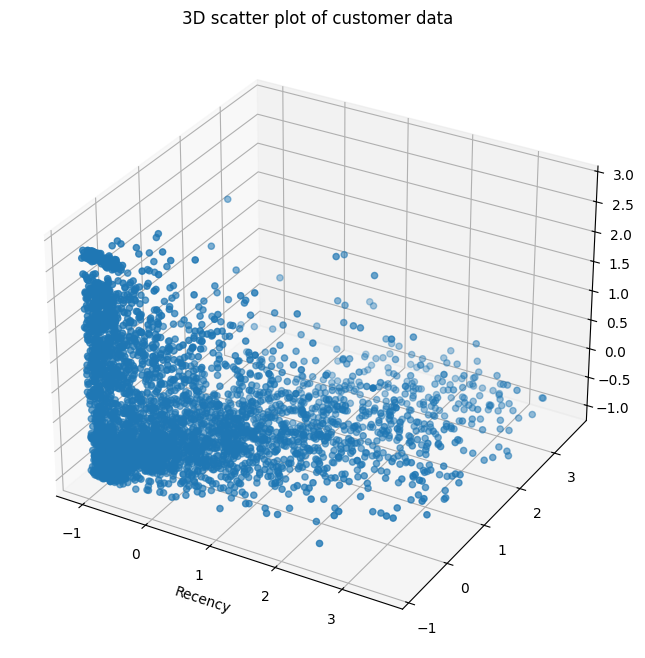

In [74]:
fig= plt.figure(figsize=(8,8))
ax=fig.add_subplot(projection='3d')
scatter= ax.scatter(scaled_data_df['MonetaryValue'], scaled_data_df['Frequency'], scaled_data_df['Recency'])

ax.set_xlabel('Monetary Value')
ax.set_xlabel('Frequency')
ax.set_xlabel('Recency')

ax.set_title('3D scatter plot of customer data')

plt.show()


### KMEANS CLUSTERING 

note: the K is a free parameter determininig how many clusters we need to use. to determine the number of clusters we need to assign to our data, we will use the elbow method.

Number of clusters is determined by number of centroids we have.To determine the number of centroids, we want to find a point where the centers are stable. The stable point is reached when the average distance from the points in the cluster to the center are minimized (that vector distance is known as the inertia)


To get the appropriate value for K, we will different values of K

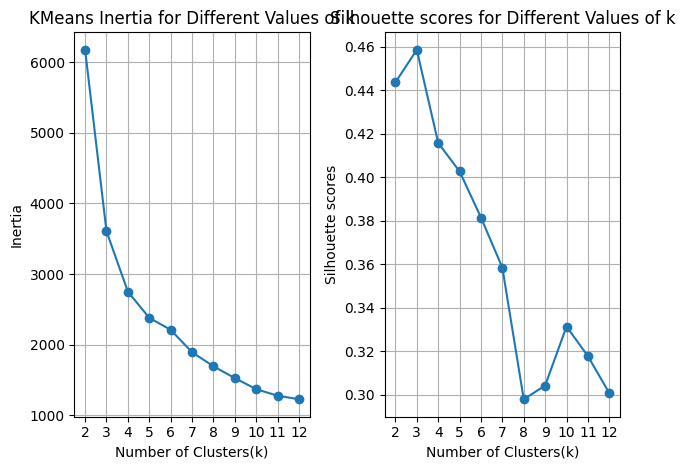

In [78]:
max_k =12
inertia=[]
silhouette_scores=[] #new inclusion to capture the solouhette score 
k_values= range(2, max_k + 1)

for k in k_values:
    kmeans= KMeans(n_clusters=k, random_state=42, max_iter=1000) #default is 300
    cluster_labels= kmeans.fit_predict(scaled_data_df) 
    
    sil_score = silhouette_score(scaled_data_df, cluster_labels)  #comparing the two in the bracket
    silhouette_scores. append(sil_score)
    
    inertia. append(kmeans.inertia_)
plt.subplot(1,2,1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette scores for Different Values of k')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Silhouette scores')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

From the graph, we can see that as the number of cluster increases past 5, there is not much change in inertia, it becomes stable. To be sure which K value wil be best we will go further to solve for the Silhouette score.

### s(i)=(b(i)=a(i))/max(a(i),b(i))

s(i) is silohouette score for a suncle sample i
a(i) is the average distance between i and all other points in the same cluster
b(i) is the minimum  average distance between i and all points in the nearest cluster to which i does not belong

sillhoiette score ranges between [-1, 1] a high silouhette score will show there is not a lot of overlap between your clusters

We will now update the code that we are using to determine the K value, so that it can allow for solving for solouhette score

After, making updates to our code, we have plotted the solhouette score graph, and can pick K to be 4 because it has a much higher silouhette score than 5 even if their inertias are close. Also, we want to minimize the amount of clusters we use because that reduces the complexity of further analyses

In [82]:
#Now that we have decided on the number of clusters(k), let's get cluster labels

kmeans=KMeans(n_clusters=4, random_state=42, max_iter=1000)
cluster_labels=kmeans.fit_predict(scaled_data_df)
cluster_labels

array([1, 0, 2, ..., 1, 0, 0], shape=(3809,), dtype=int32)

In [83]:
non_outliers_df['Cluster']=cluster_labels
non_outliers_df

C:\Users\olami\AppData\Local\Temp\ipykernel_25424\98664061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df['Cluster']=cluster_labels


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4280,18283.00,641.77,6,2010-11-22 15:30:00,17,0
4281,18284.00,411.68,1,2010-10-04 11:33:00,66,2
4282,18285.00,377.00,1,2010-02-17 10:24:00,295,1
4283,18286.00,1246.43,2,2010-08-20 11:57:00,111,0


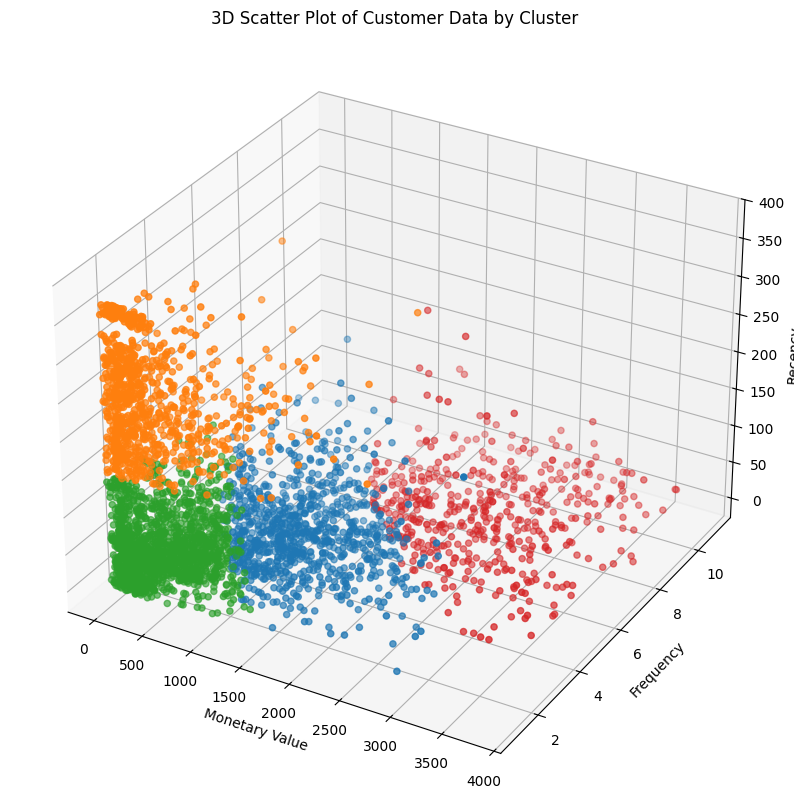

In [84]:
cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c',  # Green
                  3: '#d62728'}  # Red

colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers_df['MonetaryValue'], 
                     non_outliers_df['Frequency'], 
                     non_outliers_df['Recency'], 
                     c=colors,  # Use mapped solid colors
                     marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()

We need to see each cluster against each feature to make sense of the customer's behaviour per segment

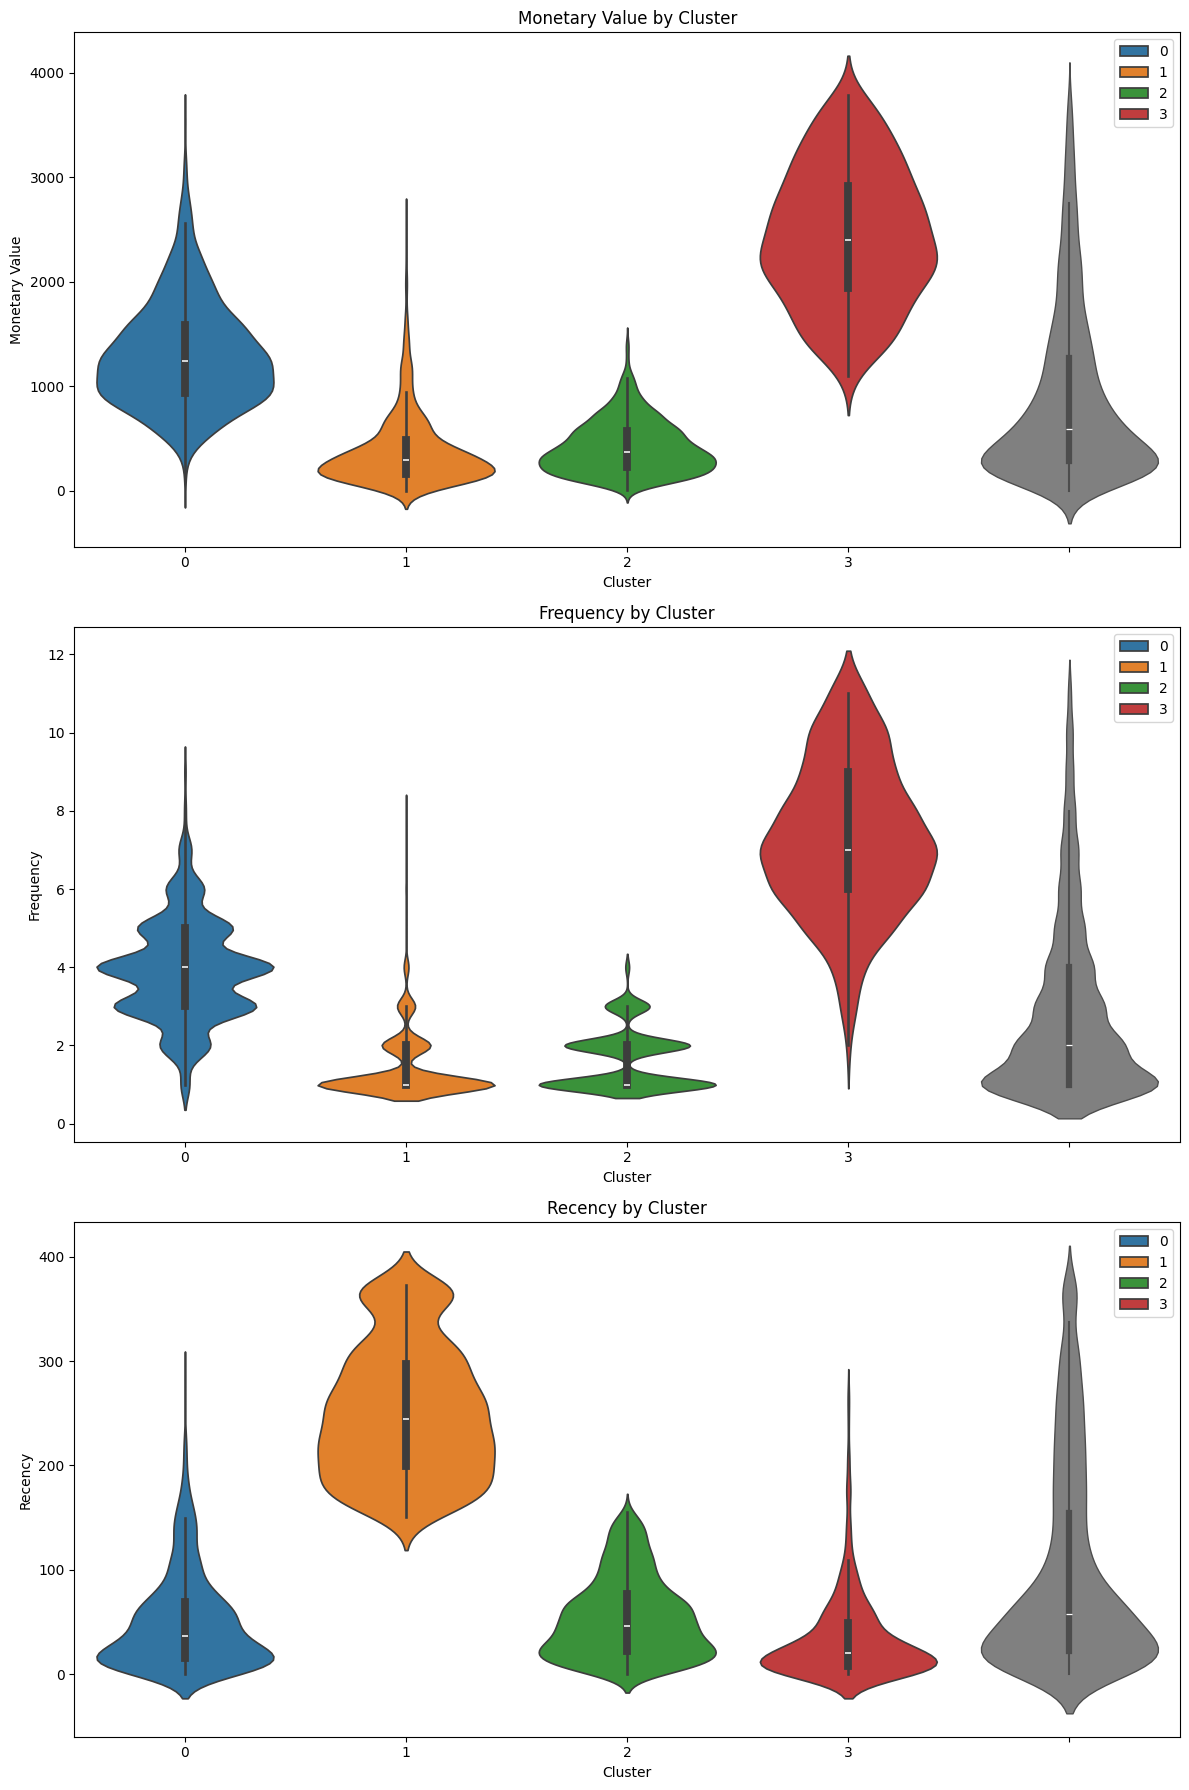

In [86]:
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['MonetaryValue'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Frequency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')


plt.subplot(3, 1, 3)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Recency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

##### Cluster 0 (Blue): "Retain"
Rationale: This cluster represents high-value customers who purchase regularly, though not always very recently. The focus should be on retention efforts to maintain their loyalty and spending levels.

Action: Implement loyalty programs, personalized offers, and regular engagement to ensure they remain active.
##### Cluster 1 (Orange): "Re-Engage"
Rationale: This group includes lower-value, infrequent buyers who haven’t purchased recently. The focus should be on re-engagement to bring them back into active purchasing behavior.

Action: Use targeted marketing campaigns, special discounts, or reminders to encourage them to return and purchase again.
##### Cluster 2 (Green): "Nurture"
Rationale: This cluster represents the least active and lowest-value customers, but they have made recent purchases. These customers may be new or need nurturing to increase their engagement and spending.

Action: Focus on building relationships, providing excellent customer service, and offering incentives to encourage more frequent purchases.
##### Cluster 3 (Red): "Reward"
Rationale: This cluster includes high-value, very frequent buyers, many of whom are still actively purchasing. They are your most loyal customers, and rewarding their loyalty is key to maintaining their engagement.

Action: Implement a robust loyalty program, provide exclusive offers, and recognize their loyalty to keep them engaged and satisfied.

Summary of Cluster Names:

Cluster 0 (Blue): "Retain"

Cluster 1 (Orange): "Re-Engage"

Cluster 2 (Green): "Nurture"

Cluster 3 (Red): "Reward"

### Outlier Analysis

We will now analyse the outliers that we set aside earier
recall: monetary_outliers_df and frequency_outliers_df are the dataframes that represent the outliers we spotted in monetary value and frequency columns. Also recall there were some overlaps

In [89]:

overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)

monetary_only_outliers = monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers = frequency_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers = monetary_outliers_df.loc[overlap_indices]

monetary_only_outliers["Cluster"] = -1
frequency_only_outliers["Cluster"] = -2
monetary_and_frequency_outliers["Cluster"] = -3

outlier_clusters_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])

outlier_clusters_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
9,12357.00,11229.99,1,2010-11-16 10:05:00,23,-1
25,12380.00,4782.84,4,2010-08-31 14:54:00,100,-1
42,12409.00,12346.62,4,2010-10-15 10:24:00,55,-1
48,12415.00,19468.84,4,2010-11-29 15:07:00,10,-1
61,12431.00,4145.52,11,2010-12-01 10:03:00,8,-1
...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3


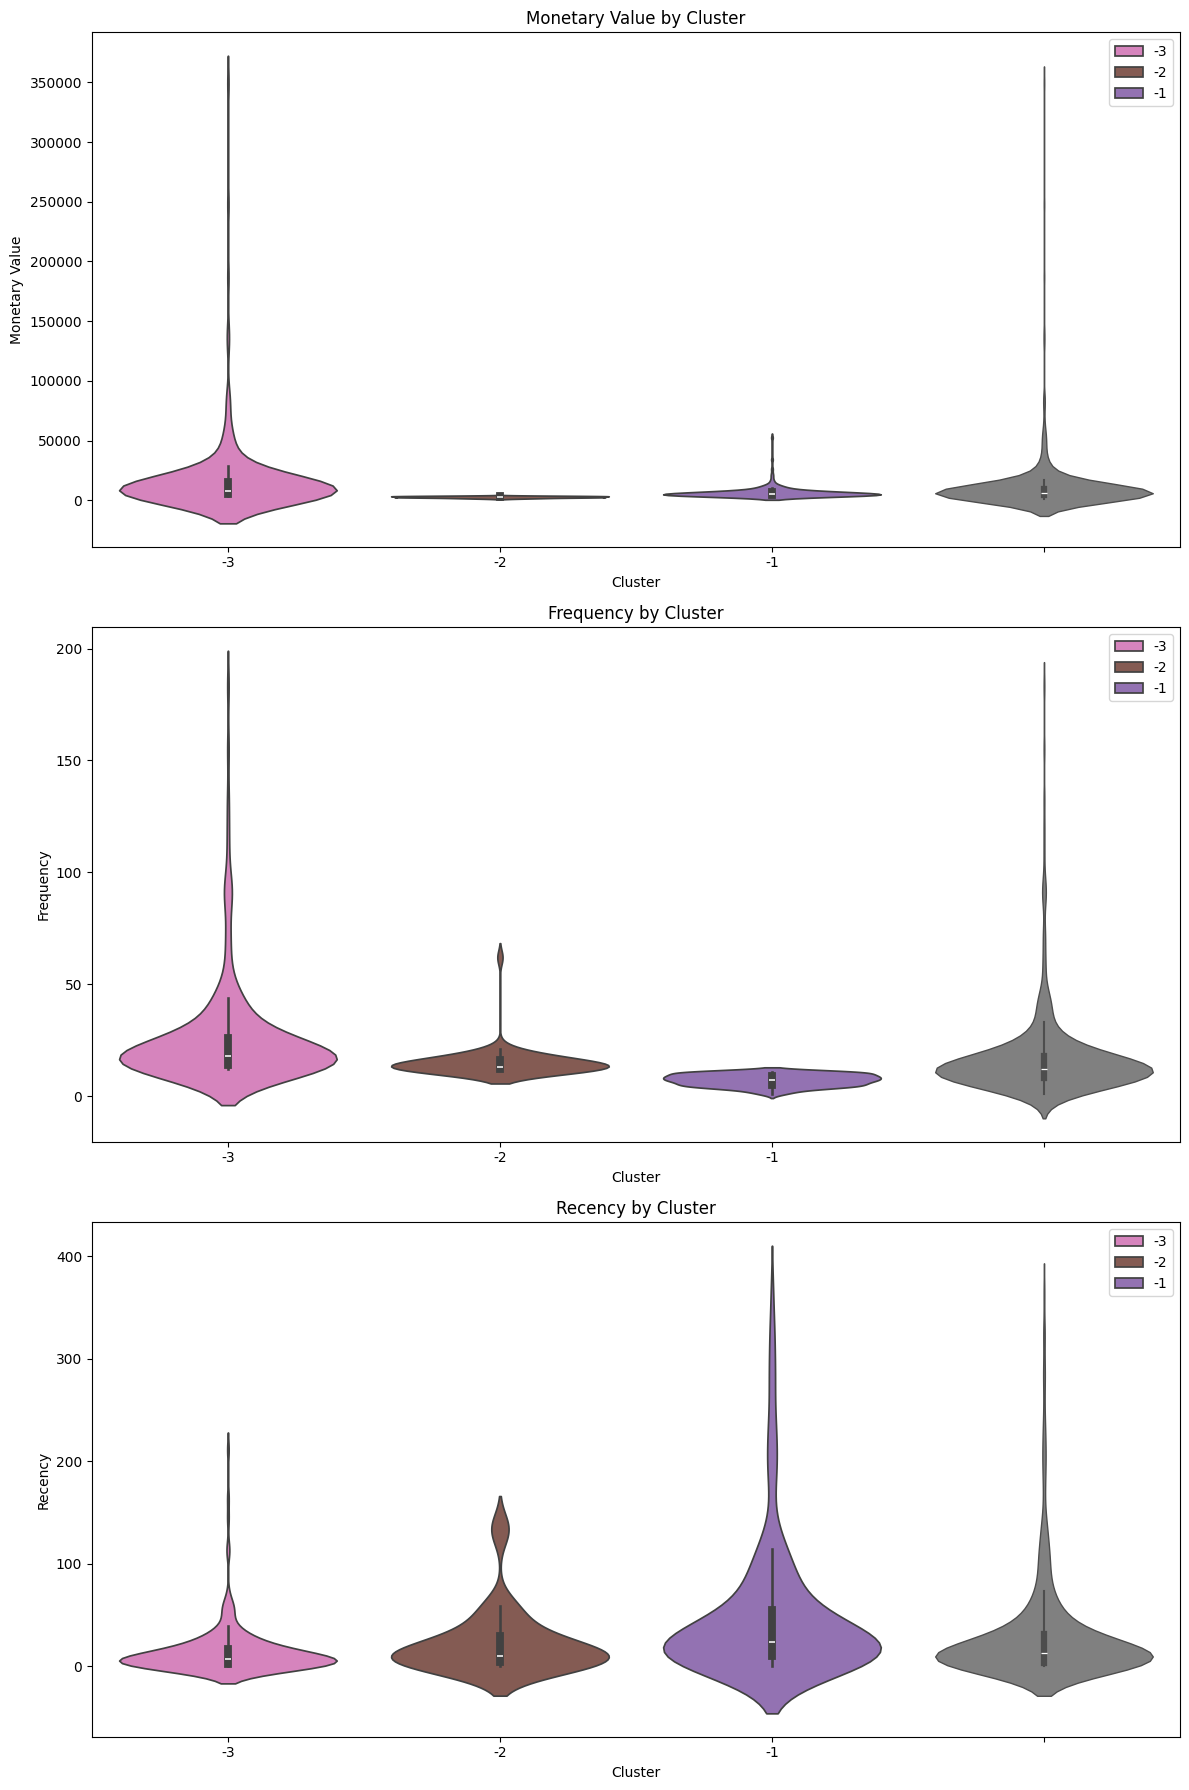

In [90]:
cluster_colors = {-1: '#9467bd',
                  -2: '#8c564b',
                  -3: '#e377c2'}

plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['MonetaryValue'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Frequency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Recency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

Cluster -1 (Monetary Outliers) PAMPER: Characteristics: High spenders but not necessarily frequent buyers. Their purchases are large but infrequent. Potential Strategy: Focus on maintaining their loyalty with personalized offers or luxury services that cater to their high spending capacity.

Cluster -2 (Frequency Outliers) UPSELL: Characteristics: Frequent buyers who spend less per purchase. These customers are consistently engaged but might benefit from upselling opportunities. Potential Strategy: Implement loyalty programs or bundle deals to encourage higher spending per visit, given their frequent engagement.

Cluster -3 (Monetary & Frequency Outliers) DELIGHT: Characteristics: The most valuable outliers, with extreme spending and frequent purchases. They are likely your top-tier customers who require special attention. Potential Strategy: Develop VIP programs or exclusive offers to maintain their loyalty and encourage continued engagement.

In [92]:

cluster_labels = {
    0: "RETAIN",
    1: "RE-ENGAGE",
    2: "NURTURE",
    3: "REWARD",
    -1: "PAMPER",
    -2: "UPSELL",
    -3: "DELIGHT"
}

We want to combine the outliers and non outliers so we can map the decisions we make per customer to the apprpriate customer all in one dataset

In [94]:
full_clustering_df = pd.concat([non_outliers_df, outlier_clusters_df])

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3


In [95]:

full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(cluster_labels)

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1,RE-ENGAGE
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0,RETAIN
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2,NURTURE
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0,RETAIN
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2,NURTURE
...,...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3,DELIGHT
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3,DELIGHT
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3,DELIGHT
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3,DELIGHT


### VISUALIZATION

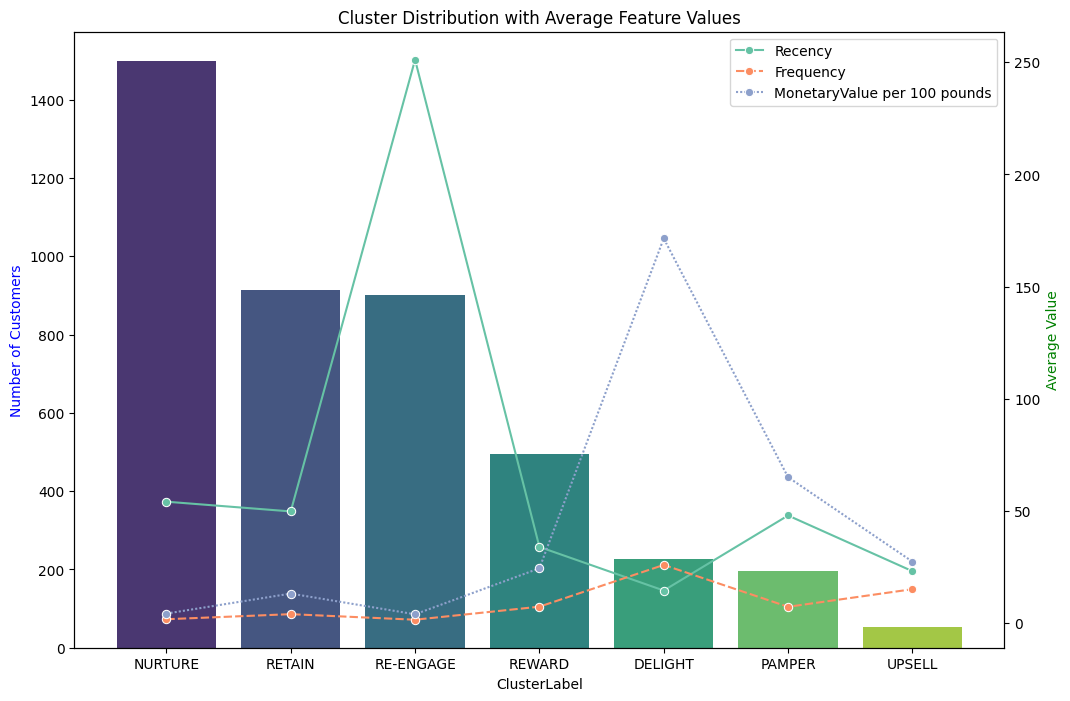

In [99]:
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()
full_clustering_df["MonetaryValue per 100 pounds"] = full_clustering_df["MonetaryValue"] / 100.00
feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.show()